In [34]:
# TensorFlow and tf.keras
import PIL
import tensorflow as tf
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from sklearn import linear_model
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [35]:
import pathlib

In [36]:
data_dir = pathlib.Path(r"D:\BT\2433_Emerging_Technologies\data\Set_A_1\Set_A\Train")
data_dir

WindowsPath('D:/BT/2433_Emerging_Technologies/data/Set_A_1/Set_A/Train')

In [37]:
listImages = list(data_dir.glob('*/*.jpg'))

image_count = len(listImages)
print(image_count)
listImages

126


[WindowsPath('D:/BT/2433_Emerging_Technologies/data/Set_A_1/Set_A/Train/1 - Hoa hong/HoaHong-001.jpg'),
 WindowsPath('D:/BT/2433_Emerging_Technologies/data/Set_A_1/Set_A/Train/1 - Hoa hong/HoaHong-002.jpg'),
 WindowsPath('D:/BT/2433_Emerging_Technologies/data/Set_A_1/Set_A/Train/1 - Hoa hong/HoaHong-003.jpg'),
 WindowsPath('D:/BT/2433_Emerging_Technologies/data/Set_A_1/Set_A/Train/1 - Hoa hong/HoaHong-004.jpg'),
 WindowsPath('D:/BT/2433_Emerging_Technologies/data/Set_A_1/Set_A/Train/1 - Hoa hong/HoaHong-005.jpg'),
 WindowsPath('D:/BT/2433_Emerging_Technologies/data/Set_A_1/Set_A/Train/1 - Hoa hong/HoaHong-006.jpg'),
 WindowsPath('D:/BT/2433_Emerging_Technologies/data/Set_A_1/Set_A/Train/1 - Hoa hong/HoaHong-007.jpg'),
 WindowsPath('D:/BT/2433_Emerging_Technologies/data/Set_A_1/Set_A/Train/1 - Hoa hong/HoaHong-008.jpg'),
 WindowsPath('D:/BT/2433_Emerging_Technologies/data/Set_A_1/Set_A/Train/1 - Hoa hong/HoaHong-009.jpg'),
 WindowsPath('D:/BT/2433_Emerging_Technologies/data/Set_A_1/Set_

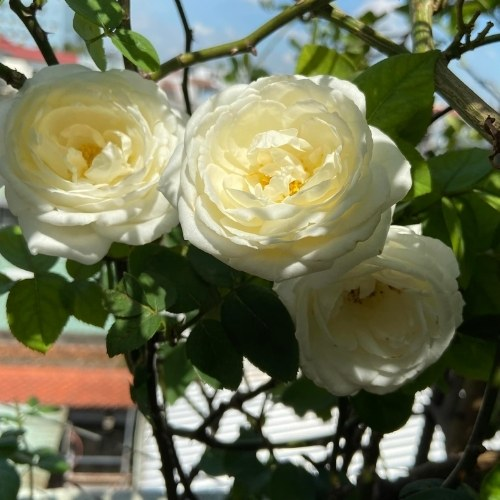

In [38]:
PIL.Image.open(str(listImages[0]))

In [39]:
# chuẩn hóa datatset 

batch_size = 16
img_height = 180
img_width = 180

In [40]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 126 files belonging to 13 classes.
Using 101 files for training.


In [41]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 126 files belonging to 13 classes.
Using 25 files for validation.


In [42]:
class_names = train_ds.class_names
print(class_names)

['1 - Hoa hong', '10 - Hoa dam but', '12 - Hong tu cau', '13 - Hoa oi', '15 - Lan hac vy', '16 - Hoa ban', '19 - Hoa Phao Bong', '20 - Hoa long den', '3 - Hoa mai', '4 - Hoa anh dao', '6 - Hoa do quyen', '7 - Hoa sao nhai', '9 - Hoa sung']


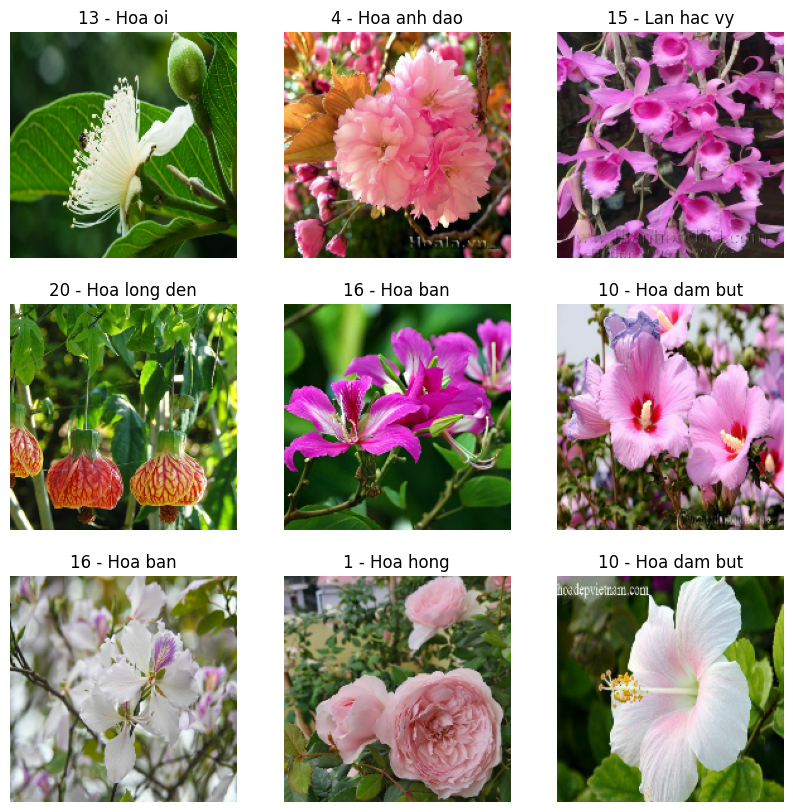

In [43]:
plt.figure(figsize=(10, 10))
train_ds = train_ds.apply(tf.data.experimental.ignore_errors())
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [44]:
## Dựng Model 

# output
num_classes = len(class_names)

# khai báo các Layers
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [45]:
# tạo model ở trên 

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) 

In [46]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 13)             │         1,677 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,990,317 (15.22 MB)

 Trainable params: 3,990,317 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.0774 - loss: 2.6698 - val_accuracy: 0.0800 - val_loss: 2.5006
Epoch 2/10
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.2500 - loss: 2.4328

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.3651 - loss: 2.4015 - val_accuracy: 0.2000 - val_loss: 2.3318
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3855 - loss: 1.9299 - val_accuracy: 0.1600 - val_loss: 2.1065
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6964 - loss: 1.3431 - val_accuracy: 0.2800 - val_loss: 2.3153
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6889 - loss: 1.0808 - val_accuracy: 0.2000 - val_loss: 2.7375
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8543 - loss: 0.5217 - val_accuracy: 0.4000 - val_loss: 1.8345
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9763 - loss: 0.2223 - val_accuracy: 0.2000 - val_loss: 3.5186
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9874 - loss: 0.0976 - val_accuracy: 0.4000 - val_loss: 2.4039
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9431 - loss: 0.3123 - val_accuracy: 0.0800 - val_loss: 4.2366
Epoch 10/10

In [48]:

for i in range(len(listImages)):
    img = tf.keras.utils.load_img(
        listImages[i] , target_size=(img_height, img_width)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print(i,
        "Predict {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
        , " ::REAL" , listImages[i]
    )



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
0 Predict 1 - Hoa hong with a 99.25 percent confidence.  ::REAL D:\BT\2433_Emerging_Technologies\data\Set_A_1\Set_A\Train\1 - Hoa hong\HoaHong-001.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1 Predict 1 - Hoa hong with a 95.21 percent confidence.  ::REAL D:\BT\2433_Emerging_Technologies\data\Set_A_1\Set_A\Train\1 - Hoa hong\HoaHong-002.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2 Predict 1 - Hoa hong with a 99.67 percent confidence.  ::REAL D:\BT\2433_Emerging_Technologies\data\Set_A_1\Set_A\Train\1 - Hoa hong\HoaHong-003.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
3 Predict 1 - Hoa hong with a 89.97 percent confidence.  ::REAL D:\BT\2433_Emerging_Technologies\data\Set_A_1\Set_A\Train\1 - Hoa hong\HoaHong-004.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
4 Predict 1 - Hoa hong with a 100.00 percent confidence.  ::REAL D:\BT\2433_Emerging_Technologies\data\Set_A_1\Set_A\Train\1 - Hoa hong\HoaHong-005.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
5 Predict 1 - Ho

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
0 Predict 13 - Hoa oi with a 34.98 percent confidence. ::REAL 0_HoaSen.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1 Predict 19 - Hoa Phao Bong with a 40.76 percent confidence. ::REAL 10_Hoa dam but.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2 Predict 12 - Hong tu cau with a 71.60 percent confidence. ::REAL 11_Hoa huong duong 002.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3 Predict 12 - Hong tu cau with a 88.24 percent confidence. ::REAL 12_Hong tu cau 005.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
4 Predict 19 - Hoa Phao Bong with a 68.38 percent confidence. ::REAL 13_Hoa oi 015.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
5 Predict 12 - Hong tu cau with a 82.60 percent confidence. ::REAL 14_Hoa Tram Oi 004.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
6 Predict 19 - Hoa Phao Bong with a 57.46 percent confidence. ::REAL 15_Lan hac vy 012.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
7 Predict 16 - Hoa ban with a 83.32 percent confidence. ::REAL 16_Hoa ban 011.jpg

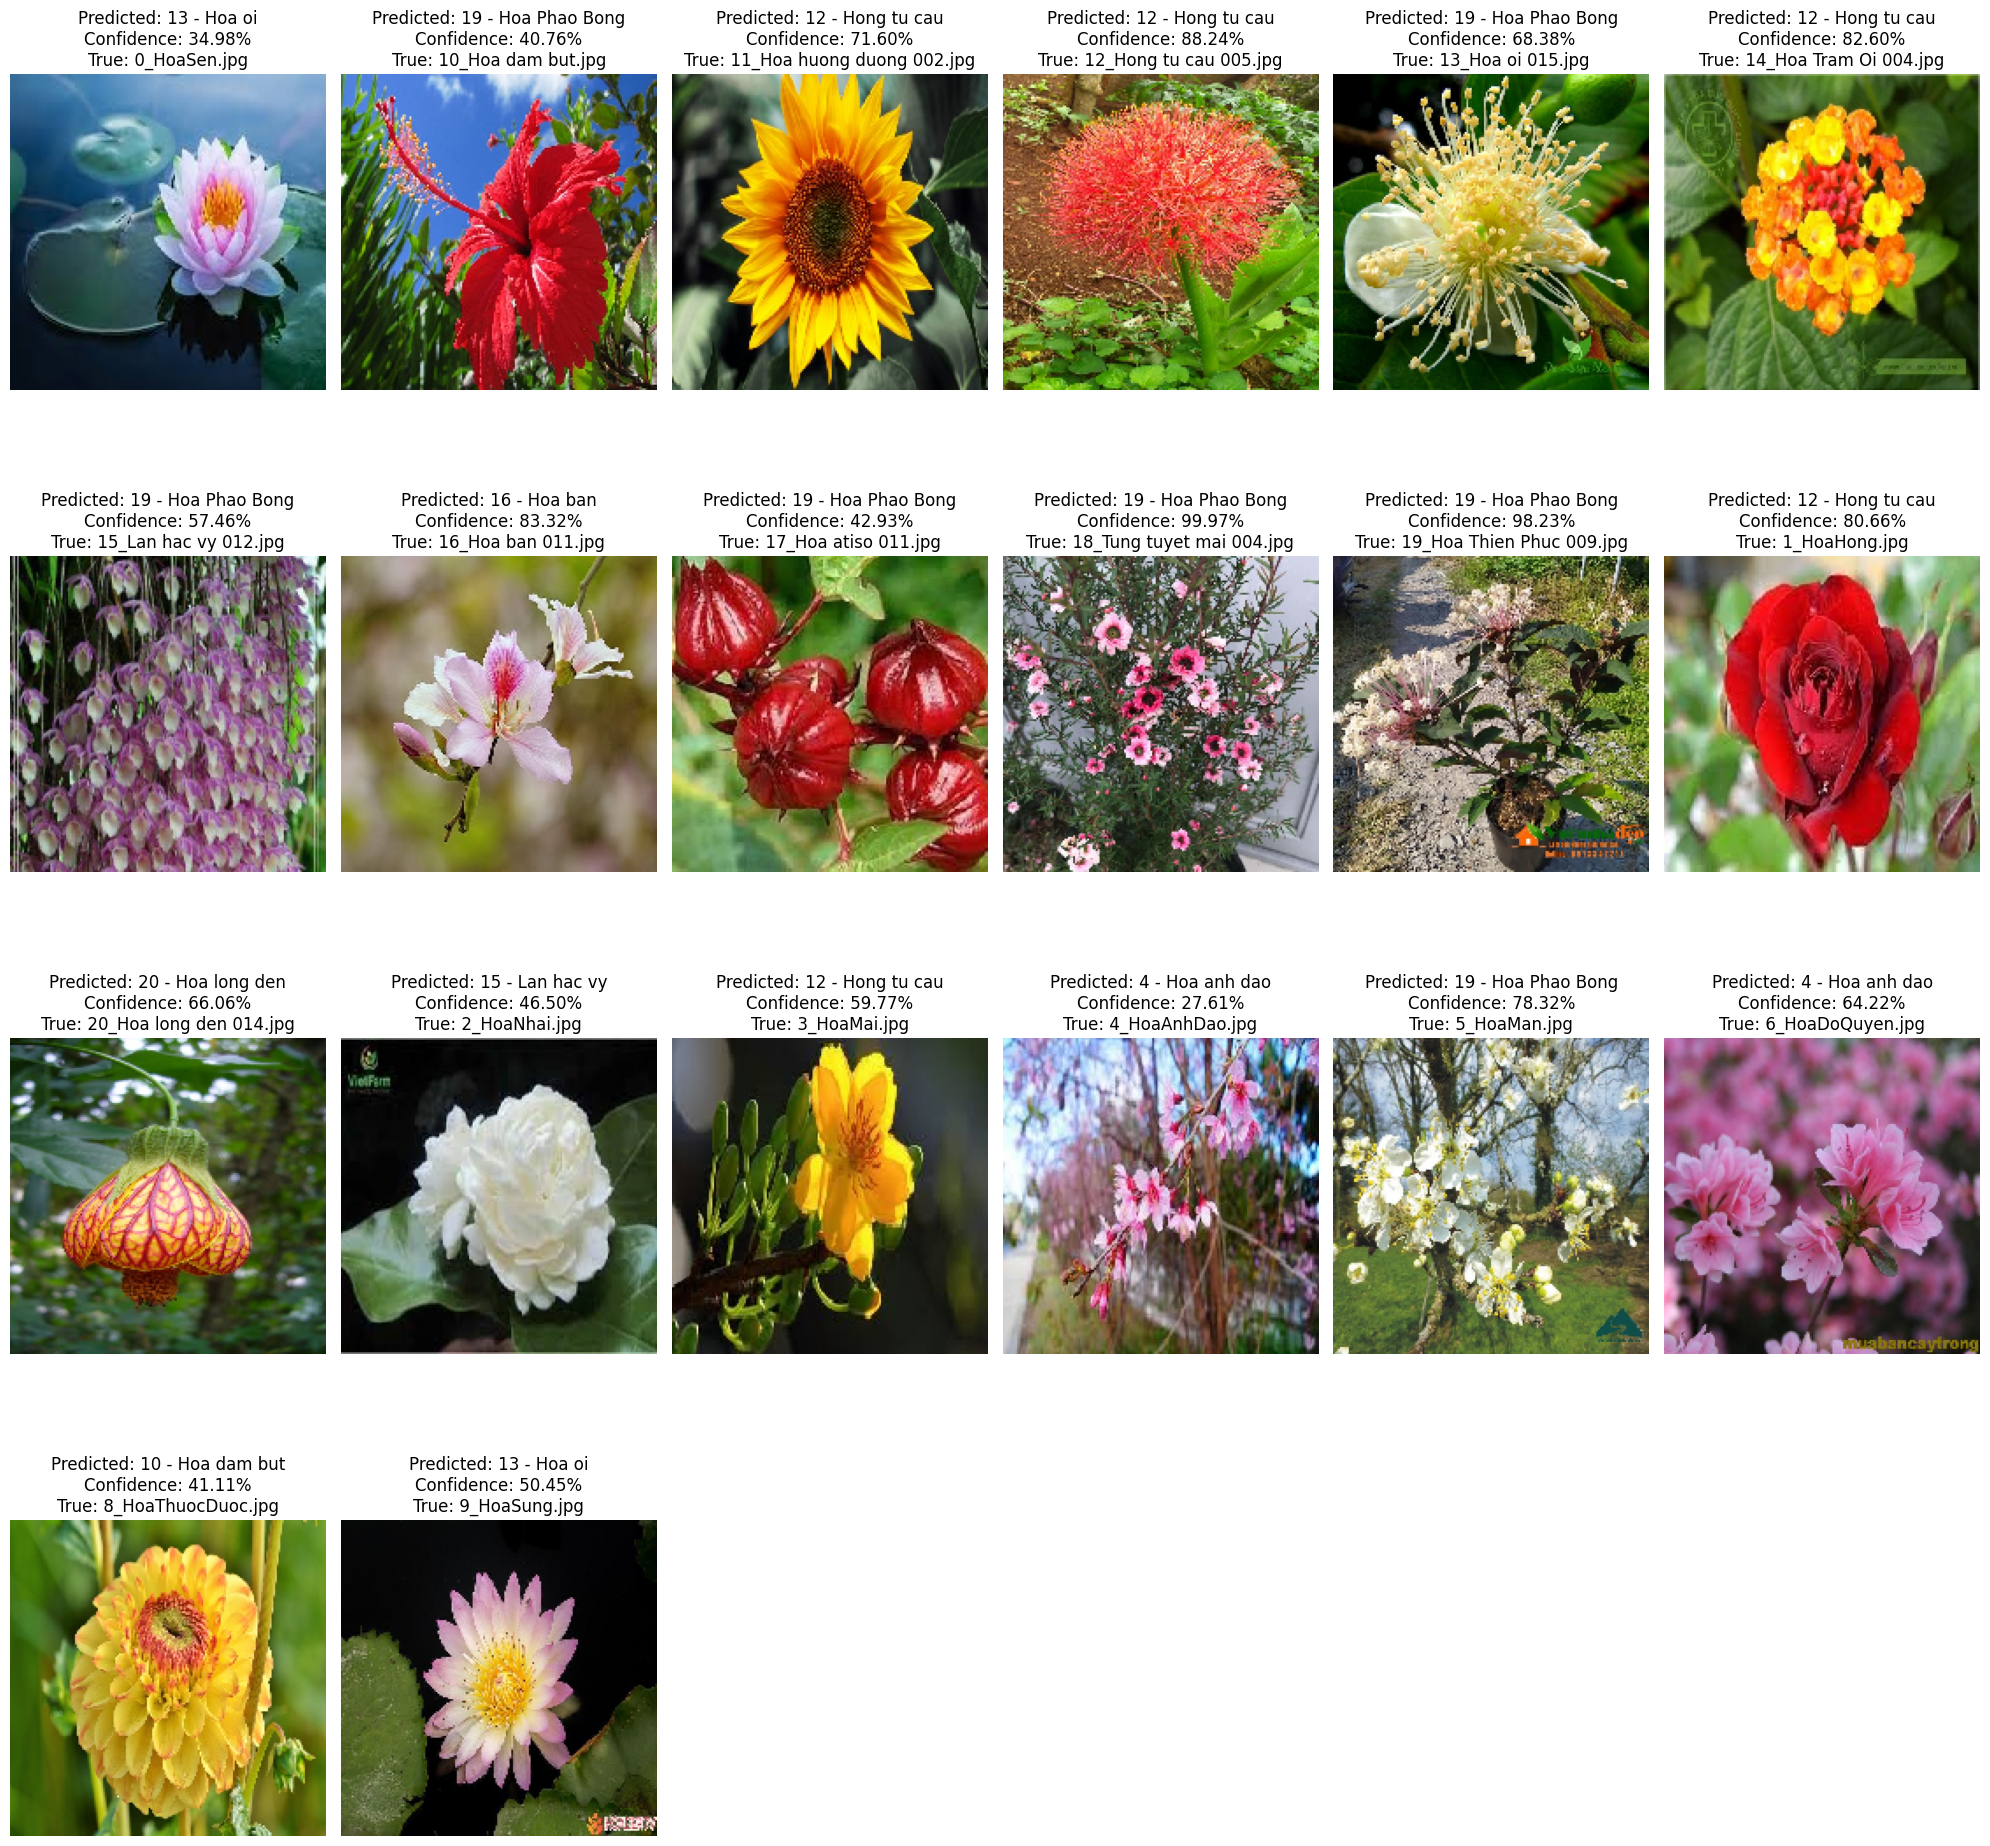

In [49]:
test_dir = pathlib.Path(r"D:\\BT\\2433_Emerging_Technologies\\data\\Set_A\\Set_A\\Test") 
listImages_test = list(test_dir.glob('*.jpg')) + list(test_dir.glob('*.webp')) + list(test_dir.glob('*.png')) + list(test_dir.glob('*.jpeg')) + list(test_dir.glob('*.jfif'))
plt.figure(figsize=(20, 20))
for i in range(len(listImages_test)):
    img = tf.keras.utils.load_img(
        listImages_test[i], target_size=(img_width, img_height)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    predicted_name = class_names[np.argmax(score)]
    confidence = 100 * np.max(score)
    true_name = listImages_test[i].name  # Extract the true name from the file name
    print(i, f"Predict {predicted_name} with a {confidence:.2f} percent confidence. ::REAL {true_name}")
    plt.subplot((len(listImages_test)//6) + 1, 6, i + 1)
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_name}\nConfidence: {confidence:.2f}%\nTrue: {true_name}")
    plt.axis("off")

plt.tight_layout()
plt.show()